# Redox Couple - Simulated

In [1]:
from pymultieis.multieis import *

In [2]:
#|hide
from IPython.display import display,Image,SVG
import numpy as np
import pandas as pd
import scipy.sparse as sps
import torch
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.facecolor'] = 'white'

In this example we shall fit simulated impedance data for a redox system. The weighting will be the modulus. First we use the `fit_deterministic` approach. 

In [3]:
F_redox_sim = torch.tensor(np.load('../../../data/redox_sim_50/freq_50.npy'))
Z_redox_sim = torch.tensor(np.load('../../../data/redox_sim_50/Z_50.npy'))
Zerr_redox_sim = torch.tensor(np.load('../../../data/redox_sim_50/mod_Z_50.npy'))


In [4]:
def redox_sim(p, f):
    w = 2*torch.pi*f
    s = 1j * w
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rct = p[3]
    Wct = p[4]
    Rw = p[5]
    Zw = 1/(1/(Wct/torch.sqrt(w) * (1-1j)) + 1/Rw)
    Z = Rs + ((s**nh)*Qh + 1/(Rct+Zw))**-1
    return torch.cat((Z.real, Z.imag), dim = 0)


In [5]:
p0_redox_sim = torch.tensor(np.array([2.1475e-06, 1.3668e-01, 9.9996e-01, 5.1322e-02, 3.8374e-03, 2.0686e-01]))

bounds_redox_sim = [[1e-15,1e15], [1e-8, 1e2], [1e-1,1e0], [1e-15,1e15], [1e-15,1e15], [1e-15,1e15]]

smf_redox_sim = torch.full((len(p0_redox_sim),),1.0)


In [6]:
eis_redox_sim = Multieis(p0_redox_sim, F_redox_sim, Z_redox_sim, bounds_redox_sim, smf_redox_sim, redox_sim, weight='modulus', immittance='impedance')

In [7]:
popt_redox_sim, perr_redox_sim, chisqr_redox_sim, chitot_redox_sim, AIC_redox_sim =  eis_redox_sim.fit_deterministic()

Using p0
Iteration : 1000, Loss : 7.91570e-07
Iteration : 1354, Loss : 7.79823e-07
Optimization complete
total time is 0:00:37.754630 

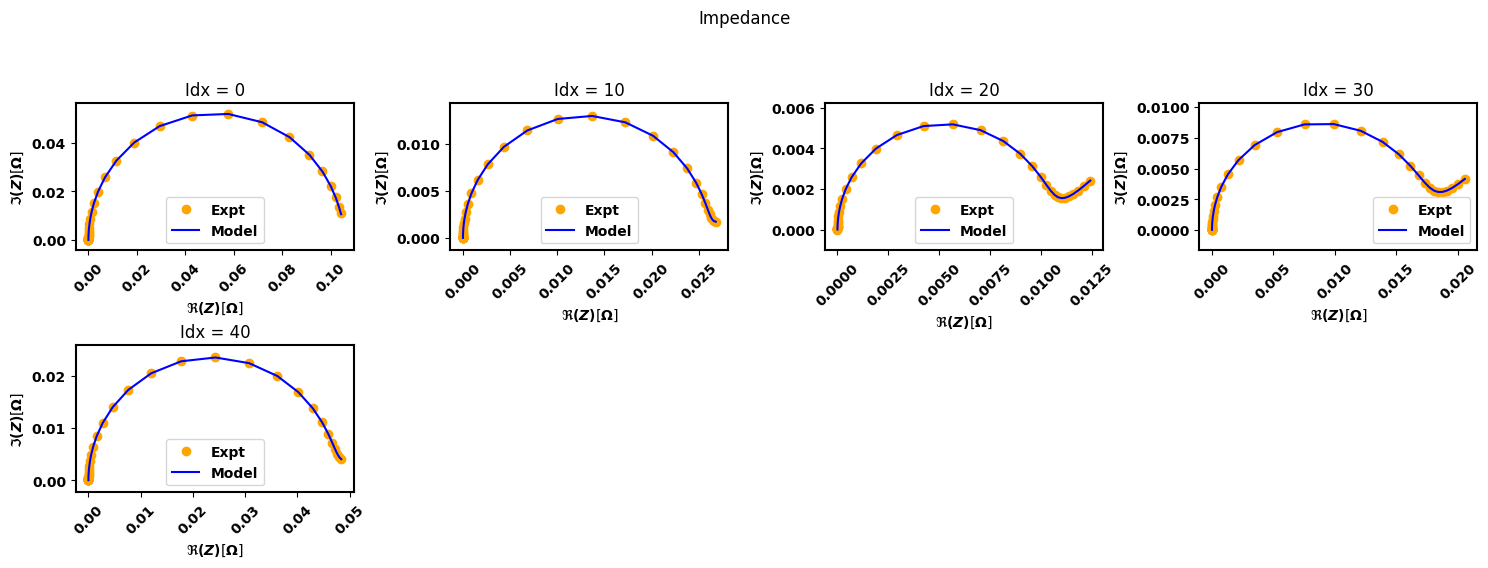

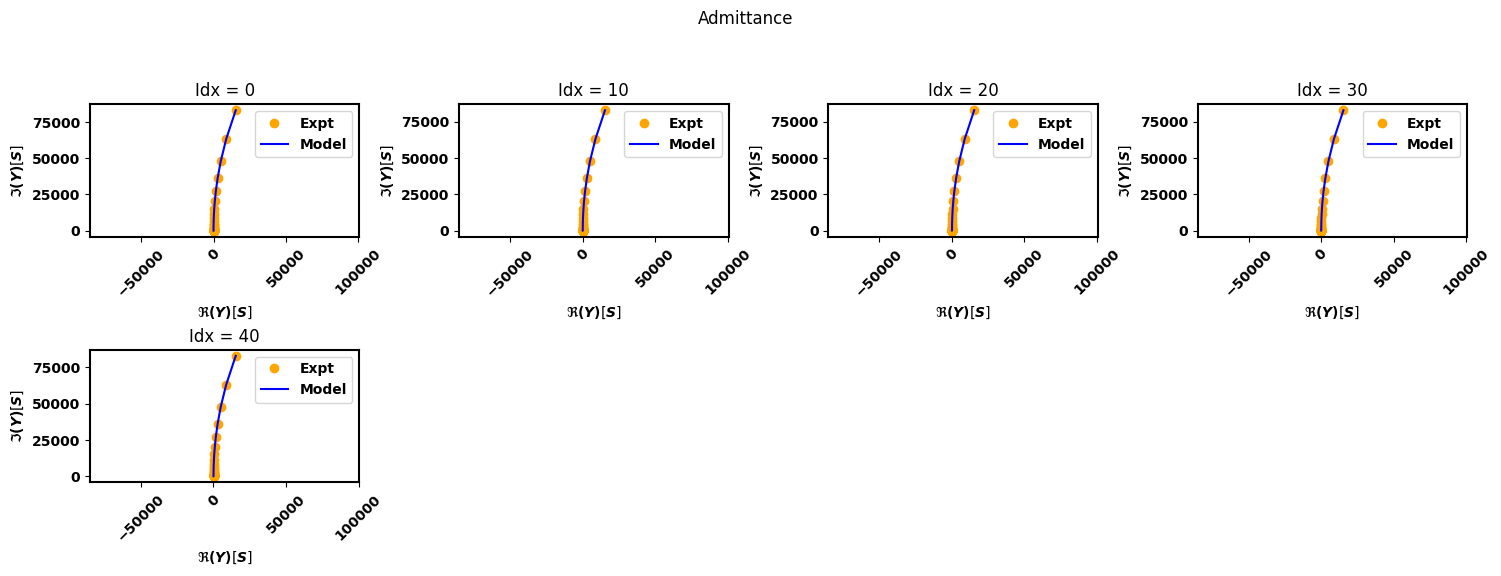

In [8]:
eis_redox_sim.plot_nyquist(steps = 10)

Examininig the Nyquist reveals a successful optimization .i.e optimal parameters were found. It could sometimes happen that the fit is bad because we chose parameters that are very close to the optimal or just that the optimizer could not find the optimal parameter. When this happens the first thing to do is to use a new set of initial guesses. For this example we re-initialize eis_redox_sim instance with the fit parameters obtained from eis_redox_exp.

In [9]:
eis_redox_sim1 = Multieis(p0_redox_sim, F_redox_sim, Z_redox_sim, bounds_redox_sim, smf_redox_sim, redox_sim, weight='modulus', immittance='impedance')

In [10]:
popt_redox_sim1, perr_redox_sim1, chisqr_redox_sim1, chitot_redox_sim1, AIC_redox_sim1 =  eis_redox_sim1.fit_refine()

Iteration : 1000, Loss : 7.00926e-07
Iteration : 2000, Loss : 6.60419e-07
Iteration : 3000, Loss : 6.34903e-07
Iteration : 3737, Loss : 6.22873e-07
Optimization complete
total time is 0:00:17.384639 

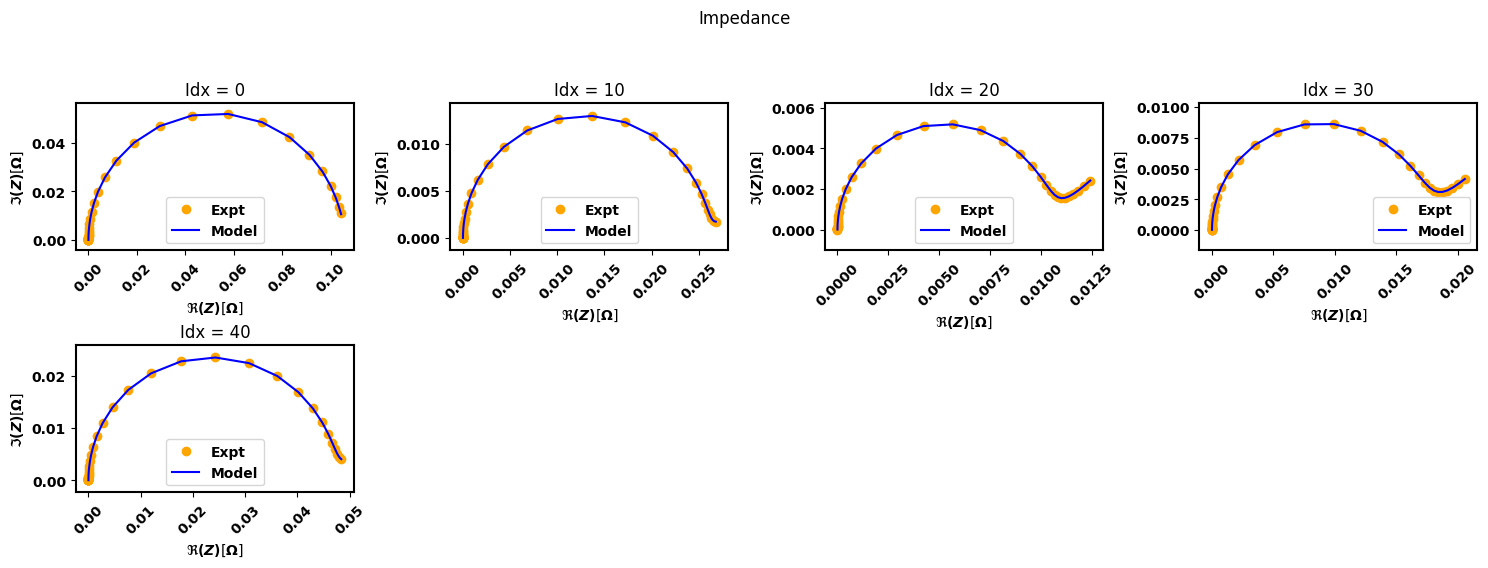

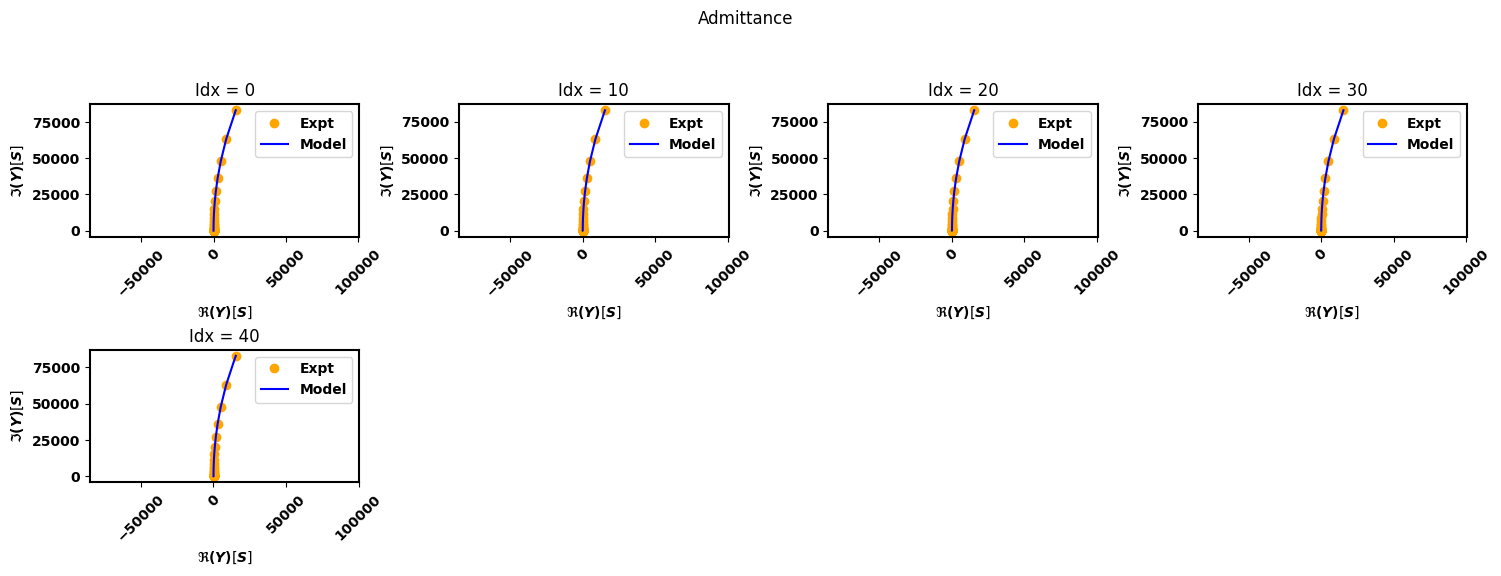

In [11]:
eis_redox_sim1.plot_nyquist(steps = 10)

We see that now the optimizer found a better set of parameters which minimize the cost function.

Another approach is to use the fit_stochastic option which is slightly more robust to a poor choice of initial values.

In [12]:
eis_redox_sim2 = Multieis(p0_redox_sim, F_redox_sim, Z_redox_sim, bounds_redox_sim, smf_redox_sim, redox_sim, weight='modulus', immittance='impedance') # Instantiate class
popt_redox_sim2, perr_redox_sim2, chisqr_redox_sim2, chitot_redox_sim2, AIC_redox_sim2 = eis_redox_sim2.fit_stochastic(lr = 1e-3, num_epochs = 1e5) # Run the minimization

0: loss=4.950e-01
10000: loss=8.178e-07
20000: loss=6.455e-07
30000: loss=6.297e-07
40000: loss=6.233e-07
50000: loss=6.197e-07
60000: loss=6.167e-07
70000: loss=6.156e-07
80000: loss=6.111e-07
90000: loss=6.070e-07

hessian inv is identity
Optimization complete
total time is 0:07:25.918516 

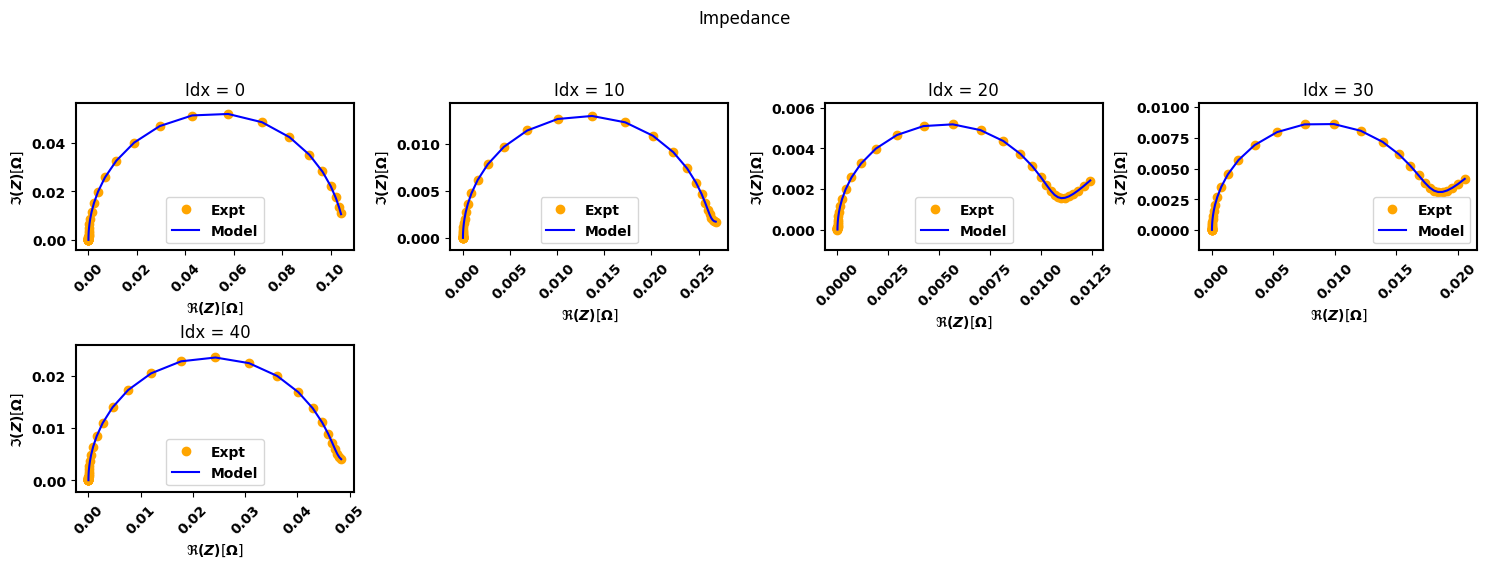

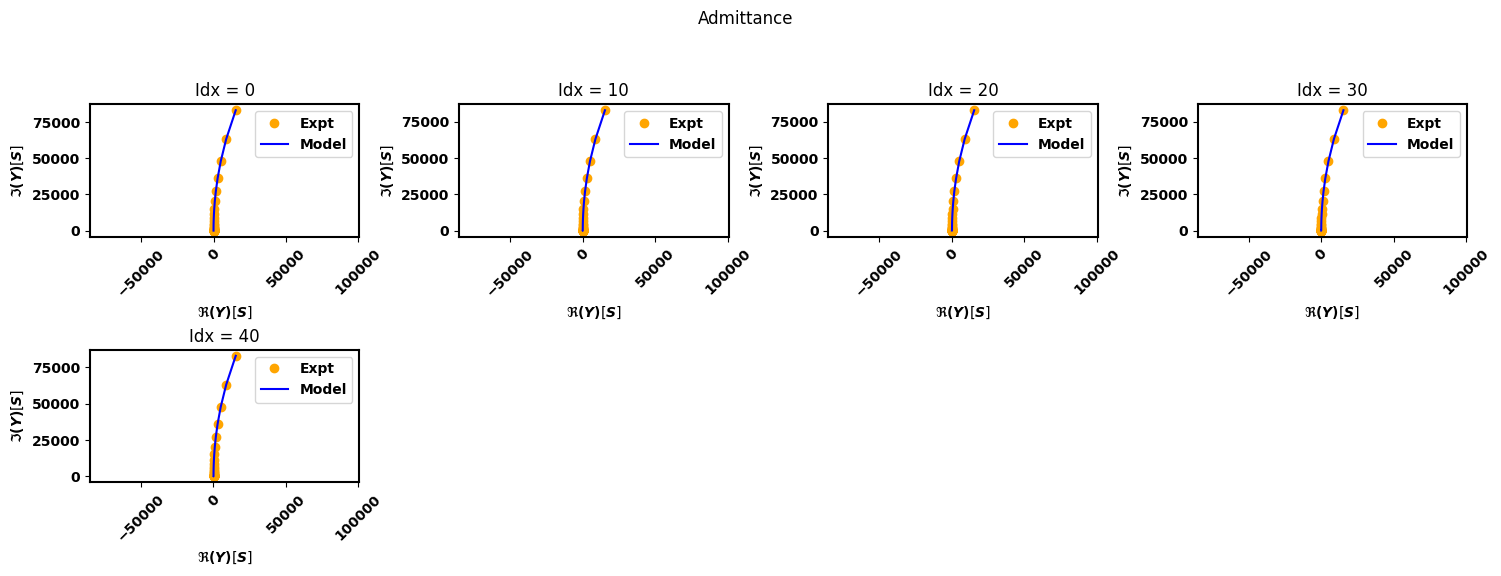

In [13]:
eis_redox_sim2.plot_nyquist(steps = 10)

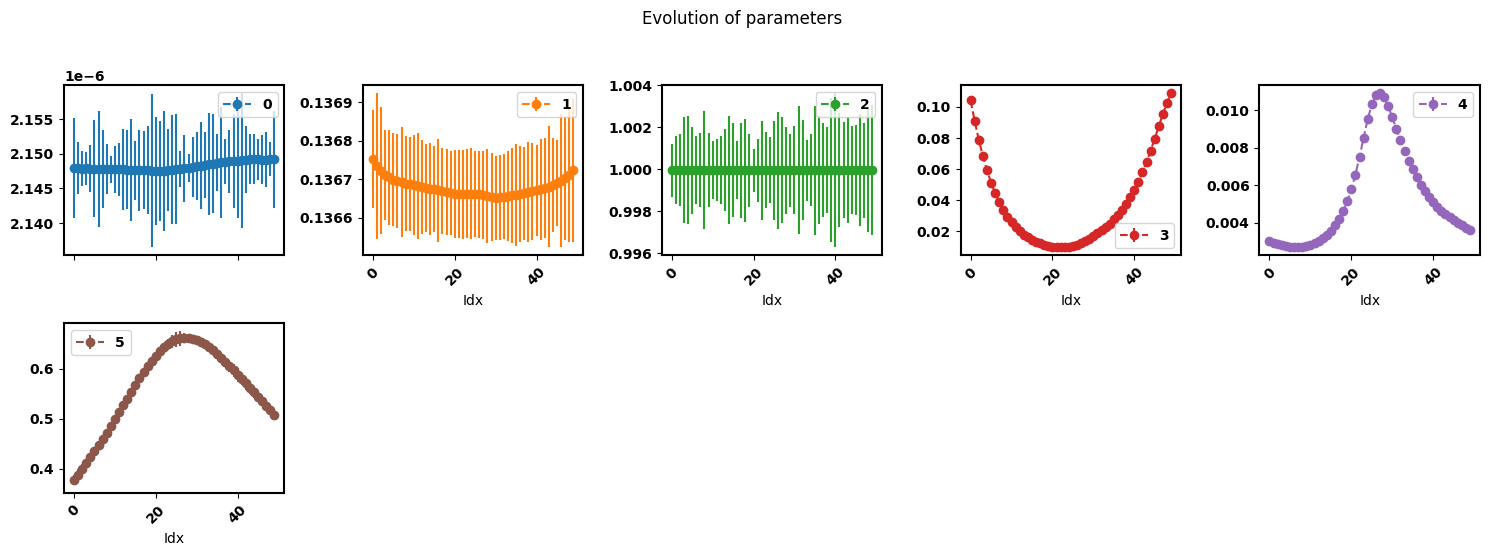

In [14]:
eis_redox_sim1.plot_params(show_errorbar=True)